In [27]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import thinkstats2
import thinkplot
import pandas as pd


In [74]:
#maping players to salaries 
#source = http://hoopshype.com/salaries/players/
salaries_file = open("salaries_over_1mil.txt",'r')

player_salaries = [];
salaries = [];
for line in salaries_file:
    player = line[3:].split('$')[0].strip().replace(".	", "")
    salary = int(line[3:].split('$')[1].replace(",",""))
    salaries.append(salary)
    player_salaries.append((player,salary))

In [75]:
#reading in player efficiency ratings (PER) and maping
#to a player
#source: http://insider.espn.com/nba/hollinger/statistics

def PER_reader():
    """
    returns a list of lists where the first list of players
    and the second list is a list of PERs where each index 
    corresponds with the player at the index in the first list
    """
    output = []
    PERs = []
    players = []

    PER_file = open("PER.txt",'r')
    PER = []

    for line in PER_file:
        line = (line.split("\t"))

        if line[0] == 'RK':
            continue

        if not line[0].isdigit():
            rank = int(rank)+1
            player = line[0] 
            PER = line[10]
            players.append(player)
            PERs.append(PER)
            continue

        rank = line[0]
        if rank == 'RK':
            continue

        player = line[1].split(", ")[0]
        PER = line[11]
        rank = int(rank)
        players.append(player)
        PERs.append(PER)
    output.append(players)
    output.append(PERs)
    return output

In [76]:
#maping a specific player's salary to his PER
def salary_PER(players_salaries,players_PERs):
    """outputs a list of lists where the first lists
    is a list of salaries from highest to lowest, and
    the second list is the PER corresponding to that salary"""
    player_PERs = []
    salaries = []
    output = []
    for entry in players_salaries:
        try:
            player = entry[0]
            salary = entry[1]
            player_PER = players_PERs[1][players_PERs[0].index(player)]
            player_PERs.append(float(player_PER))
            salaries.append(int(salary))
        except:
            continue
    output.append(salaries)
    output.append(player_PERs)
    return output


In [78]:
salaries = ((salary_PER(player_salaries,PER_reader())[0]))
PERs = ((salary_PER(player_salaries,PER_reader())[1]))


In [79]:
#mean and std of the salaries
pd_salaries = pd.Series(salaries)
mean, std = pd_salaries.mean(), pd_salaries.std()
print(mean,std)

8588186.91209 6901780.38275


In [80]:
#mean and std of the PERs
pd_PERs = pd.Series(PERs)
mean, std = pd_PERs.mean(), pd_PERs.std()
print(mean,std)

14.7877289377 5.02286609357


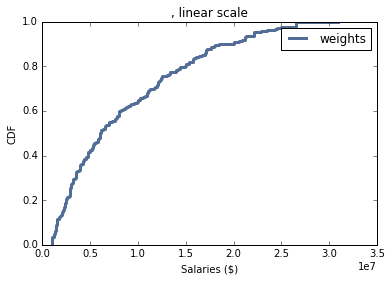

In [81]:
#cdf of salaries
cdf = thinkstats2.Cdf(salaries, label='weights')
thinkplot.Cdf(cdf)
thinkplot.Config(title=', linear scale', xlabel='Salaries ($)',
                 ylabel='CDF', loc='upper right')

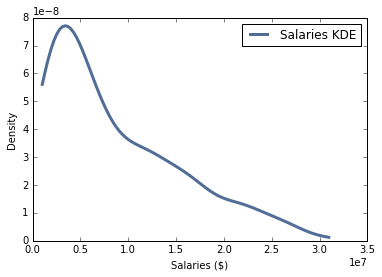

In [88]:
pdf = thinkstats2.EstimatedPdf(salaries)
thinkplot.Pdf(pdf, label='Salaries KDE')
thinkplot.Config(xlabel='Salary ($)', ylabel='Density')

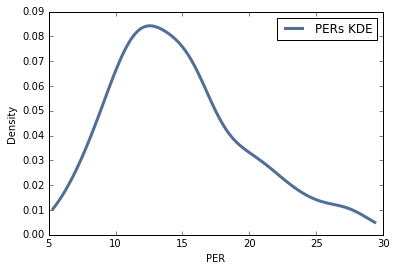

In [89]:
pdf = thinkstats2.EstimatedPdf(pd_PERs)
thinkplot.Pdf(pdf, label='PERs KDE')
thinkplot.Config(xlabel='PER', ylabel='Density')

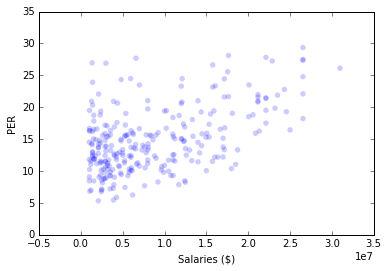

In [84]:
thinkplot.Scatter(pd_salaries,pd_PERs)
thinkplot.Show(xlabel='Salaries ($)',
              ylabel='PER')

In [85]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return thinkstats2.Corr(xranks, yranks)

#a quick correlation between salary and PER
salaries = ((salary_PER(player_salaries,PER_reader())[0]))
PERs =((salary_PER(player_salaries,PER_reader())[1]))
spearman_correlation=(SpearmanCorr(salaries,PERs))
correlation =(thinkstats2.Corr(np.array(salaries).astype(np.float),
                       np.array(PERs).astype(np.float)))
print('Correlation:', correlation)
print('Spearman Correlation:', spearman_correlation)

Correlation: 0.501978962791
Spearman Correlation: 0.387919313454
